In [9]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:

# reading the data and looking at the first five rows of the data
Pharmaceuticals=pd.read_csv("Pharmaceuticals.csv")
Pharmaceuticals.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [11]:
# statistics of the data
Pharmaceuticals.describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,57.651429,0.525714,25.461905,25.795238,10.514286,0.700000,0.585714,13.370952,15.695238
std,58.602960,0.256741,16.310257,15.084975,5.321399,0.216795,0.781310,11.048335,6.562048
min,0.410000,0.180000,3.600000,3.900000,1.400000,0.300000,0.000000,-3.170000,2.600000
25%,6.300000,0.350000,18.900000,14.900000,5.700000,0.600000,0.160000,6.380000,11.200000
50%,48.190000,0.460000,21.500000,22.600000,11.200000,0.600000,0.340000,9.370000,16.100000
75%,73.840000,0.650000,27.900000,31.000000,15.000000,0.900000,0.600000,21.870000,21.100000
max,199.470000,1.110000,82.500000,62.900000,20.300000,1.100000,3.510000,34.210000,25.500000


In [12]:
Pharmaceuticals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Name                   21 non-null     object 
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     object 
 12  Location               21 non-null     object 
 13  Exchange               21 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.4+ KB


In [13]:
Pharmaceuticals.drop(['Symbol','Name','Location','Exchange']

, axis=1, inplace=True)

In [14]:
Pharmaceuticals.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy


In [15]:
Pharmaceuticals.dropna(subset=['Market_Cap','Beta','PE_Ratio','ROA','Asset_Turnover','Leverage','Rev_Growth','Net_Profit_Margin',
                                  'Median_Recommendation' 
                                  ], inplace=True)

In [17]:
Pharmaceuticals

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold


In [18]:
#Converting categorical variables with theitr  levels 
Pharmaceuticals['Median_Recommendation'] = Pharmaceuticals['Median_Recommendation'].map({'Strong Buy': 1,'Moderate Buy': 2,'Hold': 3, 'Moderate Sell': 4,})

In [19]:
Pharmaceuticals

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,2
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,2
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,1
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,4
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,2
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,3
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,4
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,2
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,4
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,3


In [20]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Pharmaceuticals)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,1.863589e-16,-2.801991e-16,-2.643388e-16,-2.114711e-16,5.286776e-17,-2.616954e-16,1.480297e-16,-1.057355e-16,-1.903239e-16,3.172066e-17
std,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00
min,-1.000888e+00,-1.379804e+00,-1.373478e+00,-1.487304e+00,-1.755058e+00,-1.890626e+00,-7.681693e-01,-1.534116e+00,-2.044884e+00,-2.172715e+00
25%,-8.978993e-01,-7.013055e-01,-4.122530e-01,-7.400938e-01,-9.270448e-01,-4.726566e-01,-5.583279e-01,-6.483868e-01,-7.019528e-01,-9.395524e-01
50%,-1.654367e-01,-2.622769e-01,-2.489074e-01,-2.170467e-01,1.320420e-01,-4.726566e-01,-3.222564e-01,-3.710746e-01,6.320550e-02,2.936101e-01
75%,2.830633e-01,4.960453e-01,1.531738e-01,3.535501e-01,8.637746e-01,9.453132e-01,1.873584e-02,7.882574e-01,8.439793e-01,2.936101e-01
max,2.479752e+00,2.331983e+00,3.583430e+00,2.520459e+00,1.884349e+00,1.890626e+00,3.835226e+00,1.932750e+00,1.531060e+00,1.526773e+00


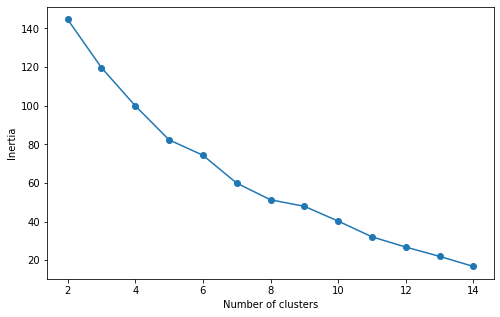

In [21]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(data_scaled)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(data_scaled)
    print("Silhouette score for {} clusters k-means : {} ".format(i,silhouette_score(data_scaled,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.196 
Silhouette score for 6 clusters k-means : 0.17 
Silhouette score for 7 clusters k-means : 0.18 
Silhouette score for 8 clusters k-means : 0.161 
Silhouette score for 9 clusters k-means : 0.129 
Silhouette score for 10 clusters k-means : 0.109 


In [23]:
kmeans_labels=KMeans(n_clusters=5,random_state=123).fit_predict(data_scaled)
     

In [24]:
from sklearn.decomposition import PCA

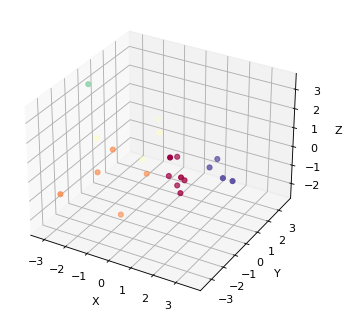

In [25]:
pca = PCA(n_components=3).fit_transform(data_scaled)
fig = plt.figure(figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')
     

In [28]:

Pharmaceuticals['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(Pharmaceuticals['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T
     

,0,1,2,4,3
Number of Customers,7,5,4,4,1


In [29]:
Pharmaceuticals

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Clusters
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,0
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,2
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,1
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,2
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,0
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,3
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,1
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,0


In [36]:
Pharmaceuticals.set_index('Clusters')
grouped=Pharmaceuticals.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation
Clusters,,,,,,,,,,
0,62.9,0.4,20.2,30.7,13.4,0.7,0.4,5.4,20.5,3.1
1,11.0,0.6,18.1,15.9,6.3,0.5,0.8,26.9,14.7,3.0
2,21.8,0.6,46.9,11.3,5.1,0.8,0.3,7.0,6.6,2.2
3,0.4,0.8,26.0,24.1,4.3,0.6,3.5,6.4,7.5,2.0
4,157.0,0.5,22.2,44.4,17.7,1.0,0.2,18.5,19.6,2.5


In [37]:
import seaborn as sns

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivap\anacond

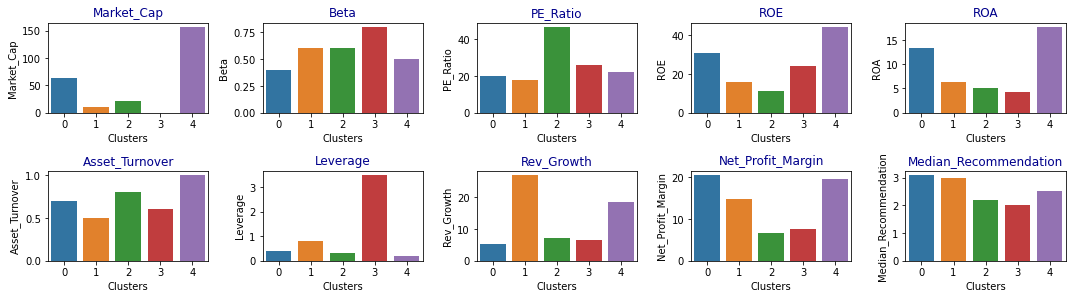

In [38]:
features=['Market_Cap','Beta','PE_Ratio','ROE','ROA','Asset_Turnover','Leverage','Rev_Growth','Net_Profit_Margin','Median_Recommendation']
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(5,5,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()